# Stroke Prediction

Importing libraries

In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\megha\University of verona\Programming\Stroke prediction\stroke_data.csv')

Data Analysis

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
data.shape

(5110, 12)

In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

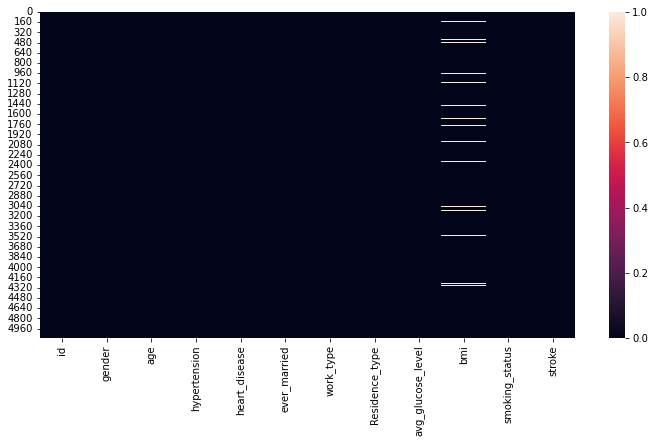

In [10]:
plt.figure(figsize = (12,6))
sns.heatmap(data.isnull())
plt.show()

In [11]:
data.drop(['id'],axis=1,inplace=True)

In [12]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
#bmi has few null values filling them by mean method
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [16]:
data.ndim

2

In [17]:
data['stroke']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [18]:
data['stroke'].unique()

array([1, 0], dtype=int64)

In [19]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Data Visualization

Text(0.5, 1.0, 'Number of Patients')

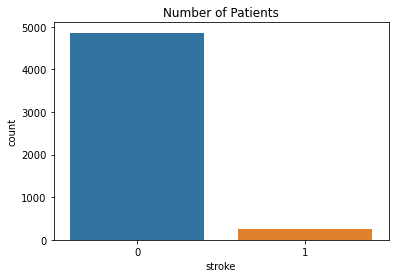

In [20]:
#no. of patients who got stroke

sns.countplot(data = data, x ='stroke')
plt.title('Number of Patients')

Text(0.5, 1.0, 'Number of Patients')

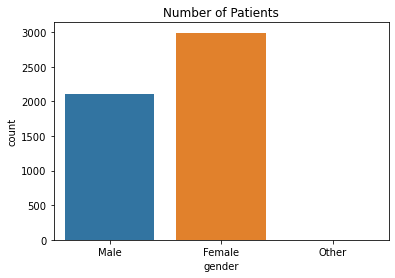

In [21]:
# stroke VS Gender
sns.countplot(data = data, x ='gender')
plt.title('Number of Patients')

Handling Numerical and categorical features

In [22]:
categorical_features = data.select_dtypes(include=['object'])
categorical_features

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [23]:
numerical_features = data.select_dtypes(include=['int64','float64'])
numerical_features

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


[Text(0.5, 1.0, 'Correlation Matrix')]

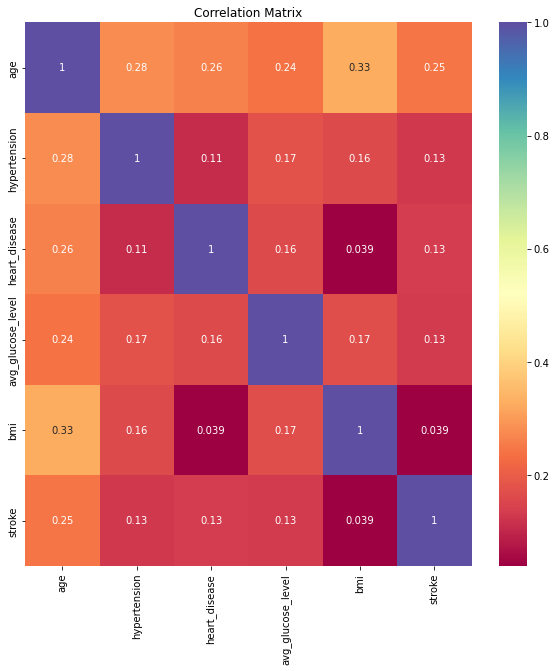

In [24]:
#Correlation matrix
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data = corr, annot = True, cmap = 'Spectral').set(title ='Correlation Matrix')

Balance Data for target column

In [25]:
data.shape

(5110, 11)

In [26]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Number of Patients')

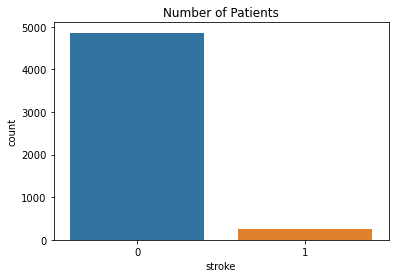

In [27]:
sns.countplot(data = data, x ='stroke')
plt.title('Number of Patients')

In [28]:
stroke_df = data[data['stroke'] == 1]
stroke_df.shape

(249, 11)

In [29]:
no_stroke_df = data[data['stroke'] == 0]
no_stroke_df.shape

(4861, 11)

In [30]:
#considering only 300 records for pre-processing
no_stroke_data = no_stroke_df.sample(300)
no_stroke_data.shape

(300, 11)

In [31]:
#Balanced dataset
new_data = pd.concat([stroke_df,no_stroke_data],axis = 0)
new_data.shape

(549, 11)

In [32]:
new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Text(0.5, 1.0, 'Number of Patients')

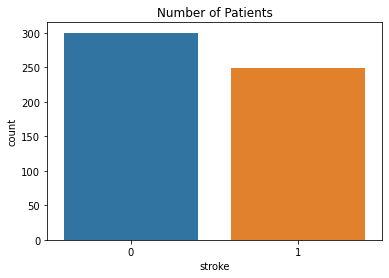

In [33]:
sns.countplot(data = new_data, x ='stroke')
plt.title('Number of Patients')

<AxesSubplot:>

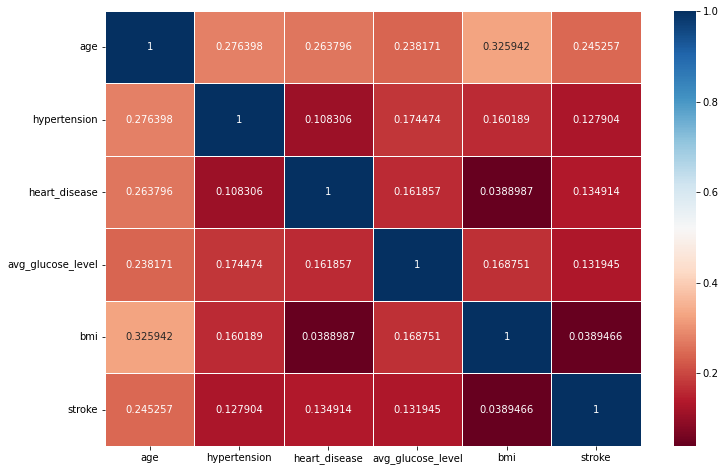

In [34]:
fig = plt.figure(figsize = (12,8))
corr = data.corr()
sns.heatmap(corr,linewidth =.5,cmap='RdBu',annot=True,fmt='g')

Visualising categorical features

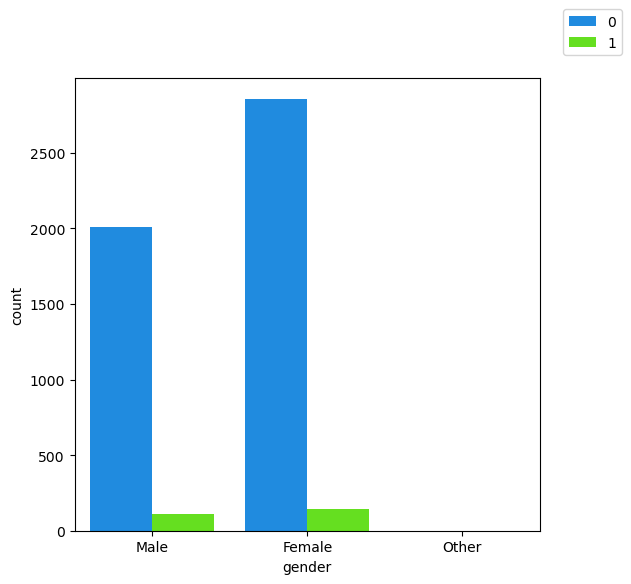

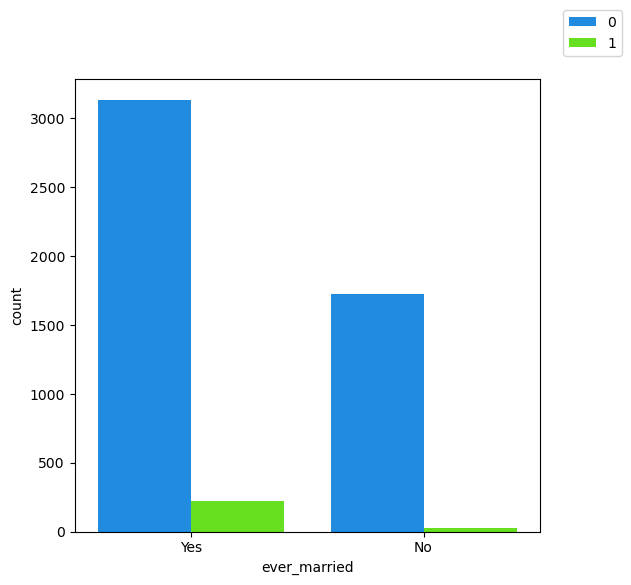

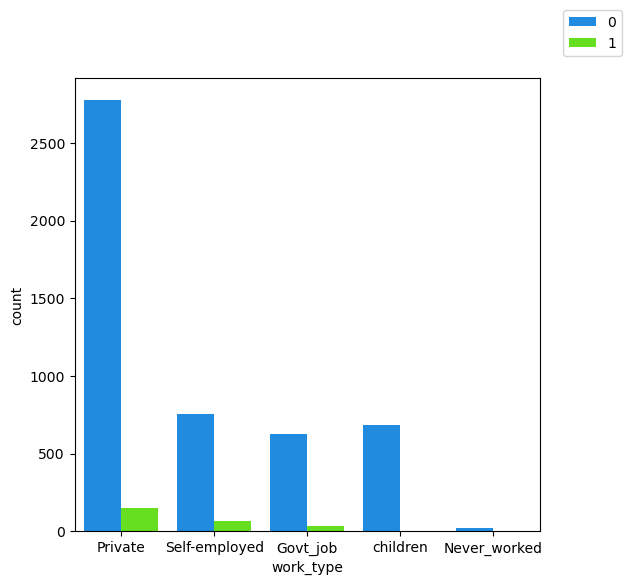

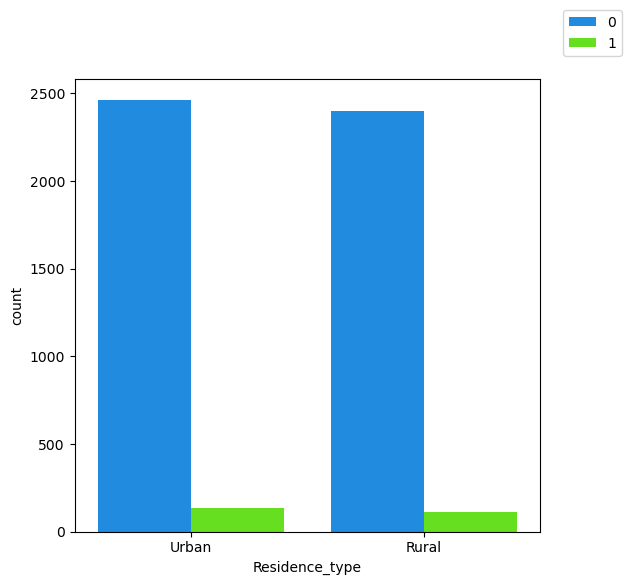

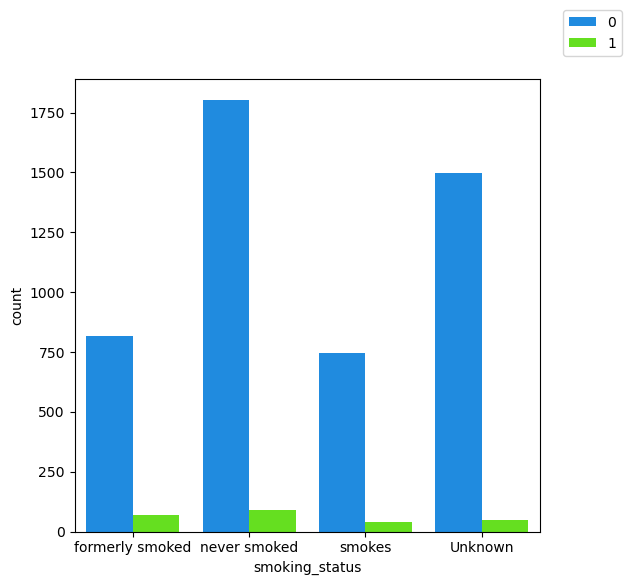

In [35]:
for col in categorical_features[:]:
    plt.figure(figsize=(6,6),dpi=100)
    sns.countplot(data =data,x=col,hue='stroke',palette = 'gist_rainbow_r')
    plt.legend(loc=(1.05,1.05))

In [36]:
categorical_features

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [37]:
#converting categorical features to numerical features
categorical_features = new_data.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
df_encoded = pd.get_dummies(new_data, columns=categorical_features)

In [38]:
df = new_data.drop(columns=categorical_features)

In [39]:
df = new_data.drop(columns=categorical_features)

In [40]:
combined_df = pd.concat([df_encoded, df], axis=1)

In [41]:
combined_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,...,0,1,0,0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1,1,0,0,1,...,0,0,1,0,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,...,0,0,1,0,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1,1,0,0,1,...,0,0,0,1,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,1,...,0,0,1,0,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,14.0,0,0,116.49,30.300000,0,1,0,1,0,...,0,0,1,0,14.0,0,0,116.49,30.300000,0
3826,75.0,0,0,94.77,27.200000,0,1,0,0,1,...,0,0,1,0,75.0,0,0,94.77,27.200000,0
1425,17.0,0,0,70.01,43.000000,0,1,0,1,0,...,1,0,0,0,17.0,0,0,70.01,43.000000,0
5074,52.0,0,0,104.00,25.600000,0,1,0,0,1,...,0,0,0,1,52.0,0,0,104.00,25.600000,0


In [42]:
y = new_data['stroke']

In [43]:
x = combined_df.drop('stroke', axis= 1)

In [44]:
x.shape,y.shape

((549, 25), (549,))

Splitting training and testing data